In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import catboost as cb


In [2]:
data = pd.read_csv('Data.csv')


In [3]:
data.head()


,Cutting speed (rpm),Feed rate (mm/min),Radial depth of cut(mm),Tool wear\nTWmax
0,200,100,1.5,0.379
1,200,150,1.5,0.424
2,200,50,1.0,0.360
3,200,100,1.0,0.415
4,200,150,1.0,0.386


In [4]:
data.columns


Index(['Cutting  speed (rpm)', 'Feed rate (mm/min)', 'Radial depth of cut(mm)',
       'Tool wear\nTWmax'],
      dtype='object')

In [5]:
data.isnull().sum()


Cutting  speed (rpm)       0
Feed rate (mm/min)         0
Radial depth of cut(mm)    0
Tool wear\nTWmax           0
dtype: int64

In [18]:
X=data.drop(['Tool wear\nTWmax'], axis=1)


In [19]:
y=data['Tool wear\nTWmax']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [26]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [27]:
model = cb.CatBoostRegressor(loss_function="RMSE")
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 0.3106920	test: 0.3158622	best: 0.3158622 (0)	total: 500us	remaining: 49.5ms
1:	learn: 0.3017498	test: 0.3068597	best: 0.3068597 (1)	total: 985us	remaining: 48.3ms
2:	learn: 0.2931533	test: 0.2985001	best: 0.2985001 (2)	total: 1.35ms	remaining: 43.8ms
3:	learn: 0.2848308	test: 0.2901533	best: 0.2901533 (3)	total: 1.54ms	remaining: 37ms
4:	learn: 0.2767707	test: 0.2822063	best: 0.2822063 (4)	total: 1.75ms	remaining: 33.3ms
5:	learn: 0.2689628	test: 0.2745179	best: 0.2745179 (5)	total: 1.97ms	remaining: 30.8ms
6:	learn: 0.2613912	test: 0.2670611	best: 0.2670611 (6)	total: 2.17ms	remaining: 28.8ms
7:	learn: 0.2540000	test: 0.2597278	best: 0.2597278 (7)	total: 2.38ms	remaining: 27.4ms
8:	learn: 0.2468930	test: 0.2527206	best: 0.2527206 (8)	total: 2.57ms	remaining: 26ms
9:	learn: 0.2399800	test: 0.2458602	best: 0.2458602 (9)	total: 2.84ms	remaining: 25.6ms
10:	learn: 0.2331874	test: 0.2390348	best: 0.2390348 (10)	total: 3.04ms	remaining: 24.6ms
11:	learn: 0.2266822	test: 0.2324734

36:	learn: 0.0424425	test: 0.0637800	best: 0.0637800 (36)	total: 8.82ms	remaining: 15ms
37:	learn: 0.0419212	test: 0.0642032	best: 0.0637800 (36)	total: 9.18ms	remaining: 15ms
38:	learn: 0.0417516	test: 0.0640583	best: 0.0637800 (36)	total: 9.37ms	remaining: 14.7ms
39:	learn: 0.0414749	test: 0.0637248	best: 0.0637248 (39)	total: 9.55ms	remaining: 14.3ms
40:	learn: 0.0412145	test: 0.0641489	best: 0.0637248 (39)	total: 9.72ms	remaining: 14ms
41:	learn: 0.0409964	test: 0.0645597	best: 0.0637248 (39)	total: 9.89ms	remaining: 13.7ms
42:	learn: 0.0405990	test: 0.0641817	best: 0.0637248 (39)	total: 10.1ms	remaining: 13.3ms
43:	learn: 0.0402198	test: 0.0639495	best: 0.0637248 (39)	total: 10.3ms	remaining: 13.1ms
44:	learn: 0.0399782	test: 0.0639484	best: 0.0637248 (39)	total: 10.4ms	remaining: 12.8ms
45:	learn: 0.0398351	test: 0.0643478	best: 0.0637248 (39)	total: 10.9ms	remaining: 12.8ms
46:	learn: 0.0396772	test: 0.0643018	best: 0.0637248 (39)	total: 11.2ms	remaining: 12.6ms
47:	learn: 0.039

113:	learn: 0.0315429	test: 0.0584469	best: 0.0584469 (113)	total: 25.1ms	remaining: 7.93ms
114:	learn: 0.0315207	test: 0.0583483	best: 0.0583483 (114)	total: 25.3ms	remaining: 7.7ms
115:	learn: 0.0314947	test: 0.0583179	best: 0.0583179 (115)	total: 25.5ms	remaining: 7.47ms
116:	learn: 0.0314750	test: 0.0582279	best: 0.0582279 (116)	total: 25.8ms	remaining: 7.26ms
117:	learn: 0.0314504	test: 0.0581425	best: 0.0581425 (117)	total: 26ms	remaining: 7.04ms
118:	learn: 0.0314305	test: 0.0581855	best: 0.0581425 (117)	total: 26.2ms	remaining: 6.82ms
119:	learn: 0.0313941	test: 0.0581042	best: 0.0581042 (119)	total: 26.6ms	remaining: 6.65ms
120:	learn: 0.0313735	test: 0.0580234	best: 0.0580234 (120)	total: 26.8ms	remaining: 6.42ms
121:	learn: 0.0313536	test: 0.0579286	best: 0.0579286 (121)	total: 27ms	remaining: 6.2ms
122:	learn: 0.0313208	test: 0.0579180	best: 0.0579180 (122)	total: 27.3ms	remaining: 6ms
123:	learn: 0.0313012	test: 0.0578932	best: 0.0578932 (123)	total: 27.6ms	remaining: 5.79

57:	learn: 0.0373620	test: 0.0647325	best: 0.0633391 (49)	total: 12.3ms	remaining: 19.5ms
58:	learn: 0.0372419	test: 0.0647553	best: 0.0633391 (49)	total: 12.6ms	remaining: 19.4ms
59:	learn: 0.0368905	test: 0.0644347	best: 0.0633391 (49)	total: 12.8ms	remaining: 19.1ms
60:	learn: 0.0365982	test: 0.0641611	best: 0.0633391 (49)	total: 12.9ms	remaining: 18.9ms
61:	learn: 0.0365071	test: 0.0640016	best: 0.0633391 (49)	total: 13.1ms	remaining: 18.6ms
62:	learn: 0.0362883	test: 0.0636889	best: 0.0633391 (49)	total: 13.4ms	remaining: 18.4ms
63:	learn: 0.0360461	test: 0.0634516	best: 0.0633391 (49)	total: 13.6ms	remaining: 18.3ms
64:	learn: 0.0358452	test: 0.0632485	best: 0.0632485 (64)	total: 13.9ms	remaining: 18.1ms
65:	learn: 0.0357560	test: 0.0633079	best: 0.0632485 (64)	total: 14.2ms	remaining: 18.1ms
66:	learn: 0.0355692	test: 0.0630235	best: 0.0630235 (66)	total: 14.5ms	remaining: 17.9ms
67:	learn: 0.0354750	test: 0.0628351	best: 0.0628351 (67)	total: 14.6ms	remaining: 17.6ms
68:	learn:

163:	learn: 0.0370119	test: 0.0634005	best: 0.0628687 (111)	total: 33.3ms	remaining: 7.3ms
164:	learn: 0.0369390	test: 0.0633207	best: 0.0628687 (111)	total: 33.5ms	remaining: 7.1ms
165:	learn: 0.0368702	test: 0.0632444	best: 0.0628687 (111)	total: 33.7ms	remaining: 6.9ms
166:	learn: 0.0368267	test: 0.0631895	best: 0.0628687 (111)	total: 33.9ms	remaining: 6.69ms
167:	learn: 0.0367620	test: 0.0631164	best: 0.0628687 (111)	total: 34.1ms	remaining: 6.49ms
168:	learn: 0.0367155	test: 0.0631291	best: 0.0628687 (111)	total: 34.2ms	remaining: 6.28ms
169:	learn: 0.0366565	test: 0.0632645	best: 0.0628687 (111)	total: 34.4ms	remaining: 6.08ms
170:	learn: 0.0365965	test: 0.0631964	best: 0.0628687 (111)	total: 34.6ms	remaining: 5.87ms
171:	learn: 0.0365245	test: 0.0630911	best: 0.0628687 (111)	total: 34.9ms	remaining: 5.68ms
172:	learn: 0.0364694	test: 0.0632238	best: 0.0628687 (111)	total: 35.1ms	remaining: 5.48ms
173:	learn: 0.0364173	test: 0.0633534	best: 0.0628687 (111)	total: 35.3ms	remaining

107:	learn: 0.0318331	test: 0.0583051	best: 0.0583051 (107)	total: 22.8ms	remaining: 19.4ms
108:	learn: 0.0318029	test: 0.0583336	best: 0.0583051 (107)	total: 23.1ms	remaining: 19.3ms
109:	learn: 0.0317700	test: 0.0582388	best: 0.0582388 (109)	total: 23.2ms	remaining: 19ms
110:	learn: 0.0317392	test: 0.0581266	best: 0.0581266 (110)	total: 23.4ms	remaining: 18.8ms
111:	learn: 0.0317093	test: 0.0580397	best: 0.0580397 (111)	total: 23.6ms	remaining: 18.5ms
112:	learn: 0.0316811	test: 0.0579371	best: 0.0579371 (112)	total: 23.8ms	remaining: 18.3ms
113:	learn: 0.0316538	test: 0.0579086	best: 0.0579086 (113)	total: 24ms	remaining: 18.1ms
114:	learn: 0.0316287	test: 0.0578151	best: 0.0578151 (114)	total: 24.2ms	remaining: 17.9ms
115:	learn: 0.0315901	test: 0.0577304	best: 0.0577304 (115)	total: 24.4ms	remaining: 17.7ms
116:	learn: 0.0315637	test: 0.0576466	best: 0.0576466 (116)	total: 24.6ms	remaining: 17.5ms
117:	learn: 0.0315400	test: 0.0576726	best: 0.0576466 (116)	total: 24.8ms	remaining:

80:	learn: 0.0624817	test: 0.0759823	best: 0.0759823 (80)	total: 15.7ms	remaining: 23ms
81:	learn: 0.0616375	test: 0.0754048	best: 0.0754048 (81)	total: 15.9ms	remaining: 22.9ms
82:	learn: 0.0608981	test: 0.0746656	best: 0.0746656 (82)	total: 16.1ms	remaining: 22.6ms
83:	learn: 0.0602615	test: 0.0742148	best: 0.0742148 (83)	total: 16.2ms	remaining: 22.4ms
84:	learn: 0.0595192	test: 0.0735782	best: 0.0735782 (84)	total: 16.5ms	remaining: 22.3ms
85:	learn: 0.0588265	test: 0.0729986	best: 0.0729986 (85)	total: 16.7ms	remaining: 22.1ms
86:	learn: 0.0581054	test: 0.0725443	best: 0.0725443 (86)	total: 16.9ms	remaining: 21.9ms
87:	learn: 0.0574815	test: 0.0719184	best: 0.0719184 (87)	total: 17.1ms	remaining: 21.7ms
88:	learn: 0.0568853	test: 0.0714505	best: 0.0714505 (88)	total: 17.2ms	remaining: 21.5ms
89:	learn: 0.0562551	test: 0.0708975	best: 0.0708975 (89)	total: 17.5ms	remaining: 21.3ms
90:	learn: 0.0557002	test: 0.0703574	best: 0.0703574 (90)	total: 17.7ms	remaining: 21.2ms
91:	learn: 0

84:	learn: 0.0142692	test: 0.0260114	best: 0.0260114 (84)	total: 21.5ms	remaining: 3.79ms
85:	learn: 0.0140053	test: 0.0259318	best: 0.0259318 (85)	total: 21.7ms	remaining: 3.54ms
86:	learn: 0.0139719	test: 0.0258794	best: 0.0258794 (86)	total: 22ms	remaining: 3.29ms
87:	learn: 0.0139441	test: 0.0258371	best: 0.0258371 (87)	total: 22.4ms	remaining: 3.05ms
88:	learn: 0.0137093	test: 0.0257801	best: 0.0257801 (88)	total: 22.7ms	remaining: 2.8ms
89:	learn: 0.0135519	test: 0.0259506	best: 0.0257801 (88)	total: 22.9ms	remaining: 2.55ms
90:	learn: 0.0133076	test: 0.0256867	best: 0.0256867 (90)	total: 23.2ms	remaining: 2.29ms
91:	learn: 0.0132298	test: 0.0256186	best: 0.0256186 (91)	total: 23.5ms	remaining: 2.04ms
92:	learn: 0.0130258	test: 0.0254090	best: 0.0254090 (92)	total: 23.7ms	remaining: 1.78ms
93:	learn: 0.0130008	test: 0.0253671	best: 0.0253671 (93)	total: 24ms	remaining: 1.53ms
94:	learn: 0.0129623	test: 0.0253625	best: 0.0253625 (94)	total: 24.2ms	remaining: 1.27ms
95:	learn: 0.01

50:	learn: 0.1138019	test: 0.1335292	best: 0.1335292 (50)	total: 12.4ms	remaining: 11.9ms
51:	learn: 0.1119987	test: 0.1319641	best: 0.1319641 (51)	total: 13ms	remaining: 12ms
52:	learn: 0.1098203	test: 0.1298344	best: 0.1298344 (52)	total: 13.4ms	remaining: 11.8ms
53:	learn: 0.1075127	test: 0.1274547	best: 0.1274547 (53)	total: 13.6ms	remaining: 11.6ms
54:	learn: 0.1051765	test: 0.1250744	best: 0.1250744 (54)	total: 13.9ms	remaining: 11.4ms
55:	learn: 0.1032404	test: 0.1235233	best: 0.1235233 (55)	total: 14.2ms	remaining: 11.1ms
56:	learn: 0.1009319	test: 0.1211554	best: 0.1211554 (56)	total: 14.3ms	remaining: 10.8ms
57:	learn: 0.0990326	test: 0.1192964	best: 0.1192964 (57)	total: 14.6ms	remaining: 10.5ms
58:	learn: 0.0971496	test: 0.1174601	best: 0.1174601 (58)	total: 14.8ms	remaining: 10.3ms
59:	learn: 0.0951191	test: 0.1154571	best: 0.1154571 (59)	total: 14.9ms	remaining: 9.96ms
60:	learn: 0.0932944	test: 0.1137057	best: 0.1137057 (60)	total: 15.2ms	remaining: 9.74ms
61:	learn: 0.0

31:	learn: 0.1356302	test: 0.1518060	best: 0.1518060 (31)	total: 8.02ms	remaining: 29.6ms
32:	learn: 0.1323462	test: 0.1488437	best: 0.1488437 (32)	total: 8.4ms	remaining: 29.8ms
33:	learn: 0.1288872	test: 0.1454116	best: 0.1454116 (33)	total: 8.61ms	remaining: 29.4ms
34:	learn: 0.1254750	test: 0.1420695	best: 0.1420695 (34)	total: 8.82ms	remaining: 29ms
35:	learn: 0.1224574	test: 0.1390059	best: 0.1390059 (35)	total: 9.04ms	remaining: 28.6ms
36:	learn: 0.1195112	test: 0.1361481	best: 0.1361481 (36)	total: 9.27ms	remaining: 28.3ms
37:	learn: 0.1165151	test: 0.1337948	best: 0.1337948 (37)	total: 9.49ms	remaining: 28ms
38:	learn: 0.1135106	test: 0.1307249	best: 0.1307249 (38)	total: 9.67ms	remaining: 27.5ms
39:	learn: 0.1107102	test: 0.1278395	best: 0.1278395 (39)	total: 9.99ms	remaining: 27.5ms
40:	learn: 0.1079945	test: 0.1257616	best: 0.1257616 (40)	total: 10.2ms	remaining: 27.1ms
41:	learn: 0.1053588	test: 0.1237506	best: 0.1237506 (41)	total: 10.5ms	remaining: 26.9ms
42:	learn: 0.10

63:	learn: 0.0224533	test: 0.0391754	best: 0.0390958 (62)	total: 16ms	remaining: 21.6ms
64:	learn: 0.0223008	test: 0.0389233	best: 0.0389233 (64)	total: 16.4ms	remaining: 21.4ms
65:	learn: 0.0221505	test: 0.0390104	best: 0.0389233 (64)	total: 16.7ms	remaining: 21.3ms
66:	learn: 0.0220241	test: 0.0387769	best: 0.0387769 (66)	total: 16.9ms	remaining: 21ms
67:	learn: 0.0219125	test: 0.0385599	best: 0.0385599 (67)	total: 17.2ms	remaining: 20.8ms
68:	learn: 0.0218138	test: 0.0383580	best: 0.0383580 (68)	total: 17.6ms	remaining: 20.7ms
69:	learn: 0.0217034	test: 0.0384504	best: 0.0383580 (68)	total: 17.9ms	remaining: 20.4ms
70:	learn: 0.0216211	test: 0.0382614	best: 0.0382614 (70)	total: 18.3ms	remaining: 20.3ms
71:	learn: 0.0215304	test: 0.0383538	best: 0.0382614 (70)	total: 18.6ms	remaining: 20.1ms
72:	learn: 0.0214524	test: 0.0384451	best: 0.0382614 (70)	total: 18.9ms	remaining: 20ms
73:	learn: 0.0213866	test: 0.0382661	best: 0.0382614 (70)	total: 19.2ms	remaining: 19.7ms
74:	learn: 0.021

84:	learn: 0.0416422	test: 0.0599745	best: 0.0599745 (84)	total: 21.3ms	remaining: 28.9ms
85:	learn: 0.0411634	test: 0.0594089	best: 0.0594089 (85)	total: 21.7ms	remaining: 28.8ms
86:	learn: 0.0405950	test: 0.0589452	best: 0.0589452 (86)	total: 22ms	remaining: 28.6ms
87:	learn: 0.0401598	test: 0.0584399	best: 0.0584399 (87)	total: 22.4ms	remaining: 28.5ms
88:	learn: 0.0396349	test: 0.0580194	best: 0.0580194 (88)	total: 22.6ms	remaining: 28.2ms
89:	learn: 0.0392098	test: 0.0575343	best: 0.0575343 (89)	total: 23ms	remaining: 28.1ms
90:	learn: 0.0385717	test: 0.0565544	best: 0.0565544 (90)	total: 23.3ms	remaining: 27.9ms
91:	learn: 0.0380947	test: 0.0561612	best: 0.0561612 (91)	total: 23.5ms	remaining: 27.6ms
92:	learn: 0.0376729	test: 0.0557362	best: 0.0557362 (92)	total: 23.8ms	remaining: 27.4ms
93:	learn: 0.0371277	test: 0.0553067	best: 0.0553067 (93)	total: 24ms	remaining: 27.1ms
94:	learn: 0.0368225	test: 0.0549366	best: 0.0549366 (94)	total: 24.2ms	remaining: 26.8ms
95:	learn: 0.036

164:	learn: 0.0227390	test: 0.0384705	best: 0.0384705 (164)	total: 43ms	remaining: 9.13ms
165:	learn: 0.0225471	test: 0.0380566	best: 0.0380566 (165)	total: 43.5ms	remaining: 8.91ms
166:	learn: 0.0224419	test: 0.0378022	best: 0.0378022 (166)	total: 43.8ms	remaining: 8.65ms
167:	learn: 0.0223734	test: 0.0376853	best: 0.0376853 (167)	total: 44ms	remaining: 8.39ms
168:	learn: 0.0222762	test: 0.0374410	best: 0.0374410 (168)	total: 44.3ms	remaining: 8.13ms
169:	learn: 0.0220946	test: 0.0370480	best: 0.0370480 (169)	total: 44.7ms	remaining: 7.88ms
170:	learn: 0.0219198	test: 0.0366657	best: 0.0366657 (170)	total: 44.9ms	remaining: 7.62ms
171:	learn: 0.0218297	test: 0.0364363	best: 0.0364363 (171)	total: 45.3ms	remaining: 7.37ms
172:	learn: 0.0216626	test: 0.0360683	best: 0.0360683 (172)	total: 45.5ms	remaining: 7.11ms
173:	learn: 0.0215778	test: 0.0358491	best: 0.0358491 (173)	total: 45.8ms	remaining: 6.85ms
174:	learn: 0.0214174	test: 0.0356628	best: 0.0356628 (174)	total: 46.3ms	remaining:

37:	learn: 0.0328989	test: 0.0546037	best: 0.0546037 (37)	total: 9.43ms	remaining: 40.2ms
38:	learn: 0.0326160	test: 0.0542094	best: 0.0542094 (38)	total: 9.68ms	remaining: 39.9ms
39:	learn: 0.0318964	test: 0.0533842	best: 0.0533842 (39)	total: 9.9ms	remaining: 39.6ms
40:	learn: 0.0311286	test: 0.0520995	best: 0.0520995 (40)	total: 10.1ms	remaining: 39.3ms
41:	learn: 0.0306134	test: 0.0516677	best: 0.0516677 (41)	total: 10.4ms	remaining: 39ms
42:	learn: 0.0304006	test: 0.0512856	best: 0.0512856 (42)	total: 10.5ms	remaining: 38.4ms
43:	learn: 0.0299735	test: 0.0506906	best: 0.0506906 (43)	total: 10.8ms	remaining: 38.2ms
44:	learn: 0.0294467	test: 0.0496158	best: 0.0496158 (44)	total: 11ms	remaining: 37.9ms
45:	learn: 0.0287708	test: 0.0489503	best: 0.0489503 (45)	total: 11.3ms	remaining: 37.8ms
46:	learn: 0.0283644	test: 0.0485520	best: 0.0485520 (46)	total: 11.7ms	remaining: 38ms
47:	learn: 0.0275941	test: 0.0470344	best: 0.0470344 (47)	total: 11.9ms	remaining: 37.8ms
48:	learn: 0.0271

136:	learn: 0.0188211	test: 0.0390739	best: 0.0390739 (136)	total: 34ms	remaining: 15.6ms
137:	learn: 0.0185638	test: 0.0386269	best: 0.0386269 (137)	total: 34.3ms	remaining: 15.4ms
138:	learn: 0.0183216	test: 0.0381994	best: 0.0381994 (138)	total: 34.5ms	remaining: 15.1ms
139:	learn: 0.0180937	test: 0.0377906	best: 0.0377906 (139)	total: 34.7ms	remaining: 14.9ms
140:	learn: 0.0179991	test: 0.0374917	best: 0.0374917 (140)	total: 35ms	remaining: 14.7ms
141:	learn: 0.0177868	test: 0.0371096	best: 0.0371096 (141)	total: 35.3ms	remaining: 14.4ms
142:	learn: 0.0175869	test: 0.0367443	best: 0.0367443 (142)	total: 35.6ms	remaining: 14.2ms
143:	learn: 0.0173986	test: 0.0363953	best: 0.0363953 (143)	total: 35.9ms	remaining: 13.9ms
144:	learn: 0.0173169	test: 0.0361333	best: 0.0361333 (144)	total: 36.1ms	remaining: 13.7ms
145:	learn: 0.0171414	test: 0.0358074	best: 0.0358074 (145)	total: 36.3ms	remaining: 13.4ms
146:	learn: 0.0169760	test: 0.0354963	best: 0.0354963 (146)	total: 36.6ms	remaining:

88:	learn: 0.0007751	test: 0.0305239	best: 0.0305239 (88)	total: 27ms	remaining: 3.33ms
89:	learn: 0.0007221	test: 0.0305207	best: 0.0305207 (89)	total: 27.3ms	remaining: 3.03ms
90:	learn: 0.0006727	test: 0.0305179	best: 0.0305179 (90)	total: 27.7ms	remaining: 2.74ms
91:	learn: 0.0006267	test: 0.0305155	best: 0.0305155 (91)	total: 28ms	remaining: 2.44ms
92:	learn: 0.0005839	test: 0.0305134	best: 0.0305134 (92)	total: 28.4ms	remaining: 2.14ms
93:	learn: 0.0005441	test: 0.0305115	best: 0.0305115 (93)	total: 28.8ms	remaining: 1.84ms
94:	learn: 0.0005070	test: 0.0305099	best: 0.0305099 (94)	total: 29.2ms	remaining: 1.53ms
95:	learn: 0.0004724	test: 0.0305085	best: 0.0305085 (95)	total: 29.8ms	remaining: 1.24ms
96:	learn: 0.0004403	test: 0.0305073	best: 0.0305073 (96)	total: 30.2ms	remaining: 933us
97:	learn: 0.0004103	test: 0.0305062	best: 0.0305062 (97)	total: 30.6ms	remaining: 623us
98:	learn: 0.0003824	test: 0.0305053	best: 0.0305053 (98)	total: 30.9ms	remaining: 312us
99:	learn: 0.0003

76:	learn: 0.0123728	test: 0.0423200	best: 0.0423200 (76)	total: 30.7ms	remaining: 9.17ms
77:	learn: 0.0120339	test: 0.0421048	best: 0.0421048 (77)	total: 31.3ms	remaining: 8.84ms
78:	learn: 0.0117054	test: 0.0418995	best: 0.0418995 (78)	total: 32.3ms	remaining: 8.59ms
79:	learn: 0.0113868	test: 0.0417035	best: 0.0417035 (79)	total: 32.8ms	remaining: 8.2ms
80:	learn: 0.0110778	test: 0.0415166	best: 0.0415166 (80)	total: 33.2ms	remaining: 7.78ms
81:	learn: 0.0107780	test: 0.0413382	best: 0.0413382 (81)	total: 33.5ms	remaining: 7.36ms
82:	learn: 0.0104872	test: 0.0411682	best: 0.0411682 (82)	total: 33.9ms	remaining: 6.95ms
83:	learn: 0.0102049	test: 0.0410060	best: 0.0410060 (83)	total: 34.4ms	remaining: 6.55ms
84:	learn: 0.0099310	test: 0.0408514	best: 0.0408514 (84)	total: 34.8ms	remaining: 6.13ms
85:	learn: 0.0096651	test: 0.0407040	best: 0.0407040 (85)	total: 35.2ms	remaining: 5.73ms
86:	learn: 0.0094069	test: 0.0405635	best: 0.0405635 (86)	total: 46.3ms	remaining: 6.92ms
87:	learn: 

1:	learn: 0.3032850	test: 0.3103139	best: 0.3103139 (1)	total: 910us	remaining: 67.4ms
2:	learn: 0.2949067	test: 0.3019393	best: 0.3019393 (2)	total: 1.22ms	remaining: 59.6ms
3:	learn: 0.2866465	test: 0.2937327	best: 0.2937327 (3)	total: 1.42ms	remaining: 52ms
4:	learn: 0.2793331	test: 0.2884034	best: 0.2884034 (4)	total: 1.76ms	remaining: 51.2ms
5:	learn: 0.2715323	test: 0.2806414	best: 0.2806414 (5)	total: 1.99ms	remaining: 47.7ms
6:	learn: 0.2638835	test: 0.2729554	best: 0.2729554 (6)	total: 2.23ms	remaining: 45.7ms
7:	learn: 0.2566156	test: 0.2657900	best: 0.2657900 (7)	total: 2.48ms	remaining: 44ms
8:	learn: 0.2497774	test: 0.2591932	best: 0.2591932 (8)	total: 2.78ms	remaining: 43.6ms
9:	learn: 0.2432772	test: 0.2528811	best: 0.2528811 (9)	total: 3.08ms	remaining: 43.1ms
10:	learn: 0.2368295	test: 0.2466566	best: 0.2466566 (10)	total: 3.35ms	remaining: 42.3ms
11:	learn: 0.2302453	test: 0.2400750	best: 0.2400750 (11)	total: 3.71ms	remaining: 42.6ms
12:	learn: 0.2240736	test: 0.2338

104:	learn: 0.0363399	test: 0.0575908	best: 0.0575908 (104)	total: 30.8ms	remaining: 13.2ms
105:	learn: 0.0359292	test: 0.0572439	best: 0.0572439 (105)	total: 31.1ms	remaining: 12.9ms
106:	learn: 0.0355423	test: 0.0569273	best: 0.0569273 (106)	total: 31.5ms	remaining: 12.6ms
107:	learn: 0.0349185	test: 0.0563735	best: 0.0563735 (107)	total: 31.8ms	remaining: 12.4ms
108:	learn: 0.0343064	test: 0.0558316	best: 0.0558316 (108)	total: 32.2ms	remaining: 12.1ms
109:	learn: 0.0339635	test: 0.0555258	best: 0.0555258 (109)	total: 32.6ms	remaining: 11.9ms
110:	learn: 0.0336742	test: 0.0551919	best: 0.0551919 (110)	total: 32.9ms	remaining: 11.6ms
111:	learn: 0.0332681	test: 0.0548246	best: 0.0548246 (111)	total: 33.1ms	remaining: 11.2ms
112:	learn: 0.0326853	test: 0.0543113	best: 0.0543113 (112)	total: 33.6ms	remaining: 11ms
113:	learn: 0.0321134	test: 0.0538093	best: 0.0538093 (113)	total: 34ms	remaining: 10.7ms
114:	learn: 0.0318664	test: 0.0535572	best: 0.0535572 (114)	total: 34.2ms	remaining:

120:	learn: 0.0422814	test: 0.0654533	best: 0.0654533 (120)	total: 43.3ms	remaining: 10.4ms
121:	learn: 0.0419220	test: 0.0650881	best: 0.0650881 (121)	total: 43.7ms	remaining: 10ms
122:	learn: 0.0415788	test: 0.0647364	best: 0.0647364 (122)	total: 43.9ms	remaining: 9.64ms
123:	learn: 0.0411626	test: 0.0643995	best: 0.0643995 (123)	total: 44.3ms	remaining: 9.29ms
124:	learn: 0.0408462	test: 0.0640801	best: 0.0640801 (124)	total: 44.7ms	remaining: 8.94ms
125:	learn: 0.0404394	test: 0.0637081	best: 0.0637081 (125)	total: 45.1ms	remaining: 8.59ms
126:	learn: 0.0400816	test: 0.0634320	best: 0.0634320 (126)	total: 45.5ms	remaining: 8.23ms
127:	learn: 0.0396813	test: 0.0631078	best: 0.0631078 (127)	total: 46.4ms	remaining: 7.97ms
128:	learn: 0.0392984	test: 0.0627536	best: 0.0627536 (128)	total: 47ms	remaining: 7.64ms
129:	learn: 0.0389065	test: 0.0624353	best: 0.0624353 (129)	total: 47.3ms	remaining: 7.28ms
130:	learn: 0.0386294	test: 0.0621172	best: 0.0621172 (130)	total: 47.6ms	remaining:

181:	learn: 0.0051846	test: 0.0332474	best: 0.0332474 (181)	total: 57.4ms	remaining: 5.68ms
182:	learn: 0.0050496	test: 0.0332134	best: 0.0332134 (182)	total: 57.8ms	remaining: 5.37ms
183:	learn: 0.0049182	test: 0.0331812	best: 0.0331812 (183)	total: 58.2ms	remaining: 5.06ms
184:	learn: 0.0047903	test: 0.0331505	best: 0.0331505 (184)	total: 58.5ms	remaining: 4.75ms
185:	learn: 0.0046656	test: 0.0331213	best: 0.0331213 (185)	total: 59ms	remaining: 4.44ms
186:	learn: 0.0045443	test: 0.0330935	best: 0.0330935 (186)	total: 59.5ms	remaining: 4.13ms
187:	learn: 0.0044261	test: 0.0330671	best: 0.0330671 (187)	total: 60.2ms	remaining: 3.84ms
188:	learn: 0.0043110	test: 0.0330420	best: 0.0330420 (188)	total: 60.5ms	remaining: 3.52ms
189:	learn: 0.0041989	test: 0.0330181	best: 0.0330181 (189)	total: 60.9ms	remaining: 3.2ms
190:	learn: 0.0040897	test: 0.0329954	best: 0.0329954 (190)	total: 61.2ms	remaining: 2.88ms
191:	learn: 0.0039834	test: 0.0329738	best: 0.0329738 (191)	total: 61.6ms	remaining

104:	learn: 0.0314407	test: 0.0516269	best: 0.0516269 (104)	total: 37.1ms	remaining: 33.6ms
105:	learn: 0.0310889	test: 0.0513490	best: 0.0513490 (105)	total: 37.4ms	remaining: 33.2ms
106:	learn: 0.0304032	test: 0.0507516	best: 0.0507516 (106)	total: 38ms	remaining: 33ms
107:	learn: 0.0297329	test: 0.0501718	best: 0.0501718 (107)	total: 38.6ms	remaining: 32.8ms
108:	learn: 0.0294395	test: 0.0499106	best: 0.0499106 (108)	total: 39.1ms	remaining: 32.6ms
109:	learn: 0.0292010	test: 0.0496412	best: 0.0496412 (109)	total: 39.4ms	remaining: 32.2ms
110:	learn: 0.0288459	test: 0.0493328	best: 0.0493328 (110)	total: 39.7ms	remaining: 31.8ms
111:	learn: 0.0282101	test: 0.0487890	best: 0.0487890 (111)	total: 40.3ms	remaining: 31.7ms
112:	learn: 0.0275886	test: 0.0482614	best: 0.0482614 (112)	total: 40.8ms	remaining: 31.4ms
113:	learn: 0.0273854	test: 0.0480701	best: 0.0480701 (113)	total: 41ms	remaining: 30.9ms
114:	learn: 0.0271939	test: 0.0478783	best: 0.0478783 (114)	total: 41.4ms	remaining: 3

158:	learn: 0.0000059	test: 0.0304991	best: 0.0304991 (158)	total: 80ms	remaining: 20.6ms
159:	learn: 0.0000055	test: 0.0304991	best: 0.0304991 (159)	total: 80.3ms	remaining: 20.1ms
160:	learn: 0.0000051	test: 0.0304991	best: 0.0304991 (160)	total: 80.9ms	remaining: 19.6ms
161:	learn: 0.0000048	test: 0.0304991	best: 0.0304991 (161)	total: 81.2ms	remaining: 19.1ms
162:	learn: 0.0000045	test: 0.0304991	best: 0.0304991 (162)	total: 81.6ms	remaining: 18.5ms
163:	learn: 0.0000042	test: 0.0304991	best: 0.0304991 (163)	total: 82.2ms	remaining: 18ms
164:	learn: 0.0000039	test: 0.0304991	best: 0.0304991 (164)	total: 82.8ms	remaining: 17.6ms
165:	learn: 0.0000036	test: 0.0304991	best: 0.0304991 (165)	total: 83.2ms	remaining: 17ms
166:	learn: 0.0000034	test: 0.0304991	best: 0.0304991 (166)	total: 83.7ms	remaining: 16.5ms
167:	learn: 0.0000032	test: 0.0304991	best: 0.0304991 (167)	total: 84.1ms	remaining: 16ms
168:	learn: 0.0000029	test: 0.0304991	best: 0.0304991 (168)	total: 84.5ms	remaining: 15.

84:	learn: 0.0023443	test: 0.0321051	best: 0.0321051 (84)	total: 33.7ms	remaining: 45.6ms
85:	learn: 0.0022235	test: 0.0320835	best: 0.0320835 (85)	total: 34.3ms	remaining: 45.5ms
86:	learn: 0.0021091	test: 0.0320641	best: 0.0320641 (86)	total: 34.6ms	remaining: 45ms
87:	learn: 0.0020007	test: 0.0320465	best: 0.0320465 (87)	total: 35ms	remaining: 44.6ms
88:	learn: 0.0018979	test: 0.0320306	best: 0.0320306 (88)	total: 35.4ms	remaining: 44.2ms
89:	learn: 0.0018006	test: 0.0320163	best: 0.0320163 (89)	total: 35.7ms	remaining: 43.7ms
90:	learn: 0.0017083	test: 0.0320033	best: 0.0320033 (90)	total: 36.1ms	remaining: 43.2ms
91:	learn: 0.0016209	test: 0.0319916	best: 0.0319916 (91)	total: 36.4ms	remaining: 42.8ms
92:	learn: 0.0015380	test: 0.0319811	best: 0.0319811 (92)	total: 36.8ms	remaining: 42.4ms
93:	learn: 0.0014594	test: 0.0319716	best: 0.0319716 (93)	total: 37.3ms	remaining: 42ms
94:	learn: 0.0013849	test: 0.0319630	best: 0.0319630 (94)	total: 37.8ms	remaining: 41.7ms
95:	learn: 0.001

67:	learn: 0.0159583	test: 0.0447752	best: 0.0447752 (67)	total: 22ms	remaining: 42.8ms
68:	learn: 0.0155065	test: 0.0444503	best: 0.0444503 (68)	total: 22.7ms	remaining: 43.1ms
69:	learn: 0.0150692	test: 0.0441396	best: 0.0441396 (69)	total: 23.2ms	remaining: 43.1ms
70:	learn: 0.0146460	test: 0.0438427	best: 0.0438427 (70)	total: 23.6ms	remaining: 42.8ms
71:	learn: 0.0142363	test: 0.0435590	best: 0.0435590 (71)	total: 23.9ms	remaining: 42.4ms
72:	learn: 0.0138396	test: 0.0432879	best: 0.0432879 (72)	total: 24.2ms	remaining: 42ms
73:	learn: 0.0134553	test: 0.0430289	best: 0.0430289 (73)	total: 24.5ms	remaining: 41.7ms
74:	learn: 0.0130830	test: 0.0427816	best: 0.0427816 (74)	total: 25ms	remaining: 41.6ms
75:	learn: 0.0127223	test: 0.0425455	best: 0.0425455 (75)	total: 25.3ms	remaining: 41.3ms
76:	learn: 0.0123728	test: 0.0423200	best: 0.0423200 (76)	total: 25.7ms	remaining: 41ms
77:	learn: 0.0120339	test: 0.0421048	best: 0.0421048 (77)	total: 26ms	remaining: 40.7ms
78:	learn: 0.0117054

94:	learn: 0.0001581	test: 0.0322265	best: 0.0322265 (94)	total: 39ms	remaining: 2.05ms
95:	learn: 0.0001446	test: 0.0322264	best: 0.0322264 (95)	total: 39.9ms	remaining: 1.66ms
96:	learn: 0.0001323	test: 0.0322262	best: 0.0322262 (96)	total: 40.4ms	remaining: 1.25ms
97:	learn: 0.0001210	test: 0.0322261	best: 0.0322261 (97)	total: 40.8ms	remaining: 832us
98:	learn: 0.0001108	test: 0.0322261	best: 0.0322261 (98)	total: 41.2ms	remaining: 416us
99:	learn: 0.0001013	test: 0.0322260	best: 0.0322260 (99)	total: 41.5ms	remaining: 0us

bestTest = 0.03222600204
bestIteration = 99

73:	loss: 0.0322260	best: 0.0232539 (41)	total: 4.71s	remaining: 1.4s
0:	learn: 0.3111920	test: 0.3165340	best: 0.3165340 (0)	total: 529us	remaining: 52.4ms
1:	learn: 0.3032850	test: 0.3103139	best: 0.3103139 (1)	total: 955us	remaining: 46.8ms
2:	learn: 0.2949067	test: 0.3019393	best: 0.3019393 (2)	total: 1.2ms	remaining: 38.8ms
3:	learn: 0.2866465	test: 0.2937327	best: 0.2937327 (3)	total: 1.49ms	remaining: 35.7ms
4:

55:	learn: 0.0110377	test: 0.0386202	best: 0.0386202 (55)	total: 20ms	remaining: 15.7ms
56:	learn: 0.0104347	test: 0.0382924	best: 0.0382924 (56)	total: 20.5ms	remaining: 15.5ms
57:	learn: 0.0098664	test: 0.0379945	best: 0.0379945 (57)	total: 20.9ms	remaining: 15.2ms
58:	learn: 0.0093306	test: 0.0377239	best: 0.0377239 (58)	total: 21.5ms	remaining: 14.9ms
59:	learn: 0.0088253	test: 0.0374783	best: 0.0374783 (59)	total: 21.8ms	remaining: 14.5ms
60:	learn: 0.0083487	test: 0.0372555	best: 0.0372555 (60)	total: 22.3ms	remaining: 14.2ms
61:	learn: 0.0078991	test: 0.0370535	best: 0.0370535 (61)	total: 22.6ms	remaining: 13.9ms
62:	learn: 0.0074748	test: 0.0368705	best: 0.0368705 (62)	total: 23ms	remaining: 13.5ms
63:	learn: 0.0070743	test: 0.0367046	best: 0.0367046 (63)	total: 23.4ms	remaining: 13.2ms
64:	learn: 0.0066962	test: 0.0365545	best: 0.0365545 (64)	total: 24ms	remaining: 12.9ms
65:	learn: 0.0063392	test: 0.0364185	best: 0.0364185 (65)	total: 24.3ms	remaining: 12.5ms
66:	learn: 0.006

105:	learn: 0.0267302	test: 0.0446436	best: 0.0446436 (105)	total: 36.5ms	remaining: 15.1ms
106:	learn: 0.0260299	test: 0.0440443	best: 0.0440443 (106)	total: 36.8ms	remaining: 14.8ms
107:	learn: 0.0257629	test: 0.0438054	best: 0.0438054 (107)	total: 37ms	remaining: 14.4ms
108:	learn: 0.0252642	test: 0.0433510	best: 0.0433510 (108)	total: 37.5ms	remaining: 14.1ms
109:	learn: 0.0246025	test: 0.0427998	best: 0.0427998 (109)	total: 38.1ms	remaining: 13.8ms
110:	learn: 0.0243762	test: 0.0425960	best: 0.0425960 (110)	total: 38.3ms	remaining: 13.5ms
111:	learn: 0.0240779	test: 0.0423532	best: 0.0423532 (111)	total: 38.7ms	remaining: 13.1ms
112:	learn: 0.0237856	test: 0.0421391	best: 0.0421391 (112)	total: 39ms	remaining: 12.8ms
113:	learn: 0.0231624	test: 0.0416285	best: 0.0416285 (113)	total: 39.5ms	remaining: 12.5ms
114:	learn: 0.0227259	test: 0.0412903	best: 0.0412903 (114)	total: 39.8ms	remaining: 12.1ms
115:	learn: 0.0225702	test: 0.0411305	best: 0.0411305 (115)	total: 40.1ms	remaining:

34:	learn: 0.0269675	test: 0.0471138	best: 0.0471138 (34)	total: 9.62ms	remaining: 31.6ms
35:	learn: 0.0264163	test: 0.0466621	best: 0.0466621 (35)	total: 9.91ms	remaining: 31.4ms
36:	learn: 0.0244875	test: 0.0450097	best: 0.0450097 (36)	total: 10.2ms	remaining: 31.3ms
37:	learn: 0.0227030	test: 0.0435227	best: 0.0435227 (37)	total: 10.6ms	remaining: 31.1ms
38:	learn: 0.0210517	test: 0.0421878	best: 0.0421878 (38)	total: 10.9ms	remaining: 31.1ms
39:	learn: 0.0195234	test: 0.0409922	best: 0.0409922 (39)	total: 11.3ms	remaining: 31.2ms
40:	learn: 0.0181088	test: 0.0399238	best: 0.0399238 (40)	total: 11.8ms	remaining: 31.4ms
41:	learn: 0.0177962	test: 0.0396506	best: 0.0396506 (41)	total: 12ms	remaining: 30.8ms
42:	learn: 0.0165060	test: 0.0387303	best: 0.0387303 (42)	total: 12.3ms	remaining: 30.6ms
43:	learn: 0.0153117	test: 0.0379120	best: 0.0379120 (43)	total: 12.6ms	remaining: 30.4ms
44:	learn: 0.0148863	test: 0.0375439	best: 0.0375439 (44)	total: 12.9ms	remaining: 30.1ms
45:	learn: 0

89:	learn: 0.0017548	test: 0.0352534	best: 0.0352534 (89)	total: 36.4ms	remaining: 24.3ms
90:	learn: 0.0016649	test: 0.0352427	best: 0.0352427 (90)	total: 36.8ms	remaining: 23.9ms
91:	learn: 0.0015797	test: 0.0352331	best: 0.0352331 (91)	total: 37.3ms	remaining: 23.5ms
92:	learn: 0.0014989	test: 0.0352244	best: 0.0352244 (92)	total: 38.2ms	remaining: 23.4ms
93:	learn: 0.0014224	test: 0.0352166	best: 0.0352166 (93)	total: 38.6ms	remaining: 23ms
94:	learn: 0.0013498	test: 0.0352095	best: 0.0352095 (94)	total: 39ms	remaining: 22.6ms
95:	learn: 0.0012809	test: 0.0352031	best: 0.0352031 (95)	total: 39.4ms	remaining: 22.2ms
96:	learn: 0.0012156	test: 0.0351973	best: 0.0351973 (96)	total: 39.8ms	remaining: 21.7ms
97:	learn: 0.0011537	test: 0.0351921	best: 0.0351921 (97)	total: 40.2ms	remaining: 21.3ms
98:	learn: 0.0010950	test: 0.0351874	best: 0.0351874 (98)	total: 40.5ms	remaining: 20.9ms
99:	learn: 0.0010393	test: 0.0351832	best: 0.0351832 (99)	total: 40.9ms	remaining: 20.4ms
100:	learn: 0.

89:	learn: 0.0087882	test: 0.0391494	best: 0.0391494 (89)	total: 50.7ms	remaining: 33.8ms
90:	learn: 0.0085558	test: 0.0390236	best: 0.0390236 (90)	total: 51.4ms	remaining: 33.3ms
91:	learn: 0.0083300	test: 0.0389038	best: 0.0389038 (91)	total: 51.7ms	remaining: 32.6ms
92:	learn: 0.0081105	test: 0.0387895	best: 0.0387895 (92)	total: 52.3ms	remaining: 32.1ms
93:	learn: 0.0078972	test: 0.0386807	best: 0.0386807 (93)	total: 52.7ms	remaining: 31.4ms
94:	learn: 0.0076899	test: 0.0385770	best: 0.0385770 (94)	total: 53.1ms	remaining: 30.7ms
95:	learn: 0.0074884	test: 0.0384783	best: 0.0384783 (95)	total: 53.5ms	remaining: 30.1ms
96:	learn: 0.0072925	test: 0.0383842	best: 0.0383842 (96)	total: 53.8ms	remaining: 29.4ms
97:	learn: 0.0071020	test: 0.0382946	best: 0.0382946 (97)	total: 54.2ms	remaining: 28.7ms
98:	learn: 0.0069168	test: 0.0382093	best: 0.0382093 (98)	total: 54.6ms	remaining: 28.1ms
99:	learn: 0.0067367	test: 0.0381280	best: 0.0381280 (99)	total: 54.9ms	remaining: 27.4ms
100:	learn

74:	learn: 0.0009438	test: 0.0322530	best: 0.0322530 (74)	total: 29ms	remaining: 48.4ms
75:	learn: 0.0008628	test: 0.0322486	best: 0.0322486 (75)	total: 29.4ms	remaining: 48ms
76:	learn: 0.0007888	test: 0.0322449	best: 0.0322449 (76)	total: 30.3ms	remaining: 48.4ms
77:	learn: 0.0007212	test: 0.0322418	best: 0.0322418 (77)	total: 30.8ms	remaining: 48.2ms
78:	learn: 0.0006594	test: 0.0322392	best: 0.0322392 (78)	total: 31.3ms	remaining: 48ms
79:	learn: 0.0006029	test: 0.0322371	best: 0.0322371 (79)	total: 31.9ms	remaining: 47.8ms
80:	learn: 0.0005513	test: 0.0322352	best: 0.0322352 (80)	total: 32.4ms	remaining: 47.6ms
81:	learn: 0.0005041	test: 0.0322337	best: 0.0322337 (81)	total: 32.9ms	remaining: 47.3ms
82:	learn: 0.0004610	test: 0.0322324	best: 0.0322324 (82)	total: 33.2ms	remaining: 46.9ms
83:	learn: 0.0004216	test: 0.0322313	best: 0.0322313 (83)	total: 33.7ms	remaining: 46.6ms
84:	learn: 0.0003855	test: 0.0322304	best: 0.0322304 (84)	total: 34.2ms	remaining: 46.2ms
85:	learn: 0.000

33:	learn: 0.0290921	test: 0.0489973	best: 0.0489973 (33)	total: 10.7ms	remaining: 52.1ms
34:	learn: 0.0269675	test: 0.0471138	best: 0.0471138 (34)	total: 11.2ms	remaining: 52.8ms
35:	learn: 0.0264163	test: 0.0466621	best: 0.0466621 (35)	total: 11.7ms	remaining: 53.2ms
36:	learn: 0.0244875	test: 0.0450097	best: 0.0450097 (36)	total: 12.2ms	remaining: 53.9ms
37:	learn: 0.0227030	test: 0.0435227	best: 0.0435227 (37)	total: 12.6ms	remaining: 53.9ms
38:	learn: 0.0210517	test: 0.0421878	best: 0.0421878 (38)	total: 13.1ms	remaining: 53.9ms
39:	learn: 0.0195234	test: 0.0409922	best: 0.0409922 (39)	total: 13.7ms	remaining: 54.7ms
40:	learn: 0.0181088	test: 0.0399238	best: 0.0399238 (40)	total: 14.1ms	remaining: 54.6ms
41:	learn: 0.0177962	test: 0.0396506	best: 0.0396506 (41)	total: 14.3ms	remaining: 54ms
42:	learn: 0.0165060	test: 0.0387303	best: 0.0387303 (42)	total: 14.8ms	remaining: 54.2ms
43:	learn: 0.0153117	test: 0.0379120	best: 0.0379120 (43)	total: 15.3ms	remaining: 54.3ms
44:	learn: 0

143:	learn: 0.0219460	test: 0.0432872	best: 0.0432872 (143)	total: 51.1ms	remaining: 19.9ms
144:	learn: 0.0218189	test: 0.0431689	best: 0.0431689 (144)	total: 51.5ms	remaining: 19.5ms
145:	learn: 0.0214414	test: 0.0428746	best: 0.0428746 (145)	total: 51.8ms	remaining: 19.2ms
146:	learn: 0.0210709	test: 0.0425874	best: 0.0425874 (146)	total: 52.2ms	remaining: 18.8ms
147:	learn: 0.0207071	test: 0.0423071	best: 0.0423071 (147)	total: 52.6ms	remaining: 18.5ms
148:	learn: 0.0203501	test: 0.0420336	best: 0.0420336 (148)	total: 52.9ms	remaining: 18.1ms
149:	learn: 0.0199996	test: 0.0417667	best: 0.0417667 (149)	total: 53.3ms	remaining: 17.8ms
150:	learn: 0.0198879	test: 0.0416873	best: 0.0416873 (150)	total: 53.7ms	remaining: 17.4ms
151:	learn: 0.0195454	test: 0.0414292	best: 0.0414292 (151)	total: 54.2ms	remaining: 17.1ms
152:	learn: 0.0192092	test: 0.0411774	best: 0.0411774 (152)	total: 54.5ms	remaining: 16.7ms
153:	learn: 0.0188791	test: 0.0409319	best: 0.0409319 (153)	total: 54.9ms	remain

129:	learn: 0.0390072	test: 0.0624924	best: 0.0624924 (129)	total: 37ms	remaining: 19.9ms
130:	learn: 0.0386282	test: 0.0621710	best: 0.0621710 (130)	total: 37.5ms	remaining: 19.8ms
131:	learn: 0.0383249	test: 0.0618189	best: 0.0618189 (131)	total: 37.7ms	remaining: 19.4ms
132:	learn: 0.0380630	test: 0.0615351	best: 0.0615351 (132)	total: 37.9ms	remaining: 19.1ms
133:	learn: 0.0377314	test: 0.0612023	best: 0.0612023 (133)	total: 38.5ms	remaining: 19ms
134:	learn: 0.0374759	test: 0.0609276	best: 0.0609276 (134)	total: 38.8ms	remaining: 18.7ms
135:	learn: 0.0371715	test: 0.0606334	best: 0.0606334 (135)	total: 39.2ms	remaining: 18.4ms
136:	learn: 0.0369201	test: 0.0603455	best: 0.0603455 (136)	total: 39.4ms	remaining: 18.1ms
137:	learn: 0.0365626	test: 0.0600462	best: 0.0600462 (137)	total: 39.8ms	remaining: 17.9ms
138:	learn: 0.0362567	test: 0.0597886	best: 0.0597886 (138)	total: 40.1ms	remaining: 17.6ms
139:	learn: 0.0359070	test: 0.0594960	best: 0.0594960 (139)	total: 40.6ms	remaining:

0:	learn: 0.2903762	test: 0.2904604	best: 0.2904604 (0)
1:	learn: 0.2630391	test: 0.2631483	best: 0.2631483 (1)
2:	learn: 0.2386458	test: 0.2389485	best: 0.2389485 (2)
3:	learn: 0.2167417	test: 0.2183938	best: 0.2183938 (3)
4:	learn: 0.1968927	test: 0.1986733	best: 0.1986733 (4)
5:	learn: 0.1787140	test: 0.1806795	best: 0.1806795 (5)
6:	learn: 0.1625458	test: 0.1646713	best: 0.1646713 (6)
7:	learn: 0.1478388	test: 0.1507937	best: 0.1507937 (7)
8:	learn: 0.1346042	test: 0.1377741	best: 0.1377741 (8)
9:	learn: 0.1228043	test: 0.1270247	best: 0.1270247 (9)
10:	learn: 0.1122536	test: 0.1167152	best: 0.1167152 (10)
11:	learn: 0.1026755	test: 0.1075253	best: 0.1075253 (11)
12:	learn: 0.0942220	test: 0.0993396	best: 0.0993396 (12)
13:	learn: 0.0868529	test: 0.0922937	best: 0.0922937 (13)
14:	learn: 0.0801298	test: 0.0862155	best: 0.0862155 (14)
15:	learn: 0.0742312	test: 0.0807212	best: 0.0807212 (15)
16:	learn: 0.0691353	test: 0.0759084	best: 0.0759084 (16)
17:	learn: 0.0647525	test: 0.07191

{'params': {'depth': 4,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [28]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.5f}".format(rmse))
print("R2: {:.5f}".format(r2))
print('Accuracy score on Test data= {:.4f}'.format(model.score(X_test, y_test)))
print(model1.get_params())

Testing performance
RMSE: 0.01249
R2: 0.96127
Accuracy score on Test data= 0.9613
{'loss_function': 'RMSE'}


In [29]:
model_k = cb.CatBoostRegressor(loss_function="RMSE")
cv = KFold(n_splits=10, random_state=42)
scores = cross_val_score(model, X, y, cv=cv)
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))
comparison=pd.DataFrame()


0:	learn: 0.0578612	total: 404us	remaining: 80.4ms
1:	learn: 0.0551334	total: 947us	remaining: 93.8ms
2:	learn: 0.0535003	total: 1.44ms	remaining: 94.6ms
3:	learn: 0.0515952	total: 1.77ms	remaining: 86.7ms
4:	learn: 0.0490277	total: 2.13ms	remaining: 83ms
5:	learn: 0.0473012	total: 2.5ms	remaining: 80.7ms
6:	learn: 0.0452102	total: 2.84ms	remaining: 78.4ms
7:	learn: 0.0434000	total: 3.1ms	remaining: 74.4ms
8:	learn: 0.0429668	total: 3.35ms	remaining: 71.2ms
9:	learn: 0.0426124	total: 3.6ms	remaining: 68.4ms
10:	learn: 0.0416174	total: 3.84ms	remaining: 65.9ms
11:	learn: 0.0404749	total: 4.17ms	remaining: 65.3ms
12:	learn: 0.0393298	total: 4.56ms	remaining: 65.7ms
13:	learn: 0.0380122	total: 4.95ms	remaining: 65.8ms
14:	learn: 0.0378344	total: 5.27ms	remaining: 65ms
15:	learn: 0.0366877	total: 5.62ms	remaining: 64.7ms
16:	learn: 0.0363485	total: 6.1ms	remaining: 65.7ms
17:	learn: 0.0353280	total: 6.44ms	remaining: 65.1ms
18:	learn: 0.0352239	total: 6.66ms	remaining: 63.4ms
19:	learn: 0.

C:\Users\uchih\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


58:	learn: 0.0176559	total: 19ms	remaining: 45.3ms
59:	learn: 0.0173455	total: 19.3ms	remaining: 45ms
60:	learn: 0.0171100	total: 19.6ms	remaining: 44.7ms
61:	learn: 0.0170100	total: 20ms	remaining: 44.4ms
62:	learn: 0.0168997	total: 20.3ms	remaining: 44.2ms
63:	learn: 0.0166302	total: 21ms	remaining: 44.6ms
64:	learn: 0.0164490	total: 21.8ms	remaining: 45.3ms
65:	learn: 0.0162103	total: 22.3ms	remaining: 45.4ms
66:	learn: 0.0161254	total: 22.6ms	remaining: 44.9ms
67:	learn: 0.0159350	total: 22.9ms	remaining: 44.5ms
68:	learn: 0.0158656	total: 23.2ms	remaining: 44.1ms
69:	learn: 0.0157079	total: 23.6ms	remaining: 43.8ms
70:	learn: 0.0156369	total: 23.9ms	remaining: 43.4ms
71:	learn: 0.0153814	total: 24.3ms	remaining: 43.2ms
72:	learn: 0.0153192	total: 24.6ms	remaining: 42.8ms
73:	learn: 0.0152644	total: 25ms	remaining: 42.5ms
74:	learn: 0.0150432	total: 25.3ms	remaining: 42.1ms
75:	learn: 0.0148995	total: 34.6ms	remaining: 56.4ms
76:	learn: 0.0148491	total: 35.4ms	remaining: 56.5ms
77:

162:	learn: 0.0072085	total: 54.4ms	remaining: 12.4ms
163:	learn: 0.0071515	total: 55ms	remaining: 12.1ms
164:	learn: 0.0071066	total: 55.3ms	remaining: 11.7ms
165:	learn: 0.0070575	total: 55.7ms	remaining: 11.4ms
166:	learn: 0.0070062	total: 56ms	remaining: 11.1ms
167:	learn: 0.0069652	total: 56.4ms	remaining: 10.7ms
168:	learn: 0.0069136	total: 56.6ms	remaining: 10.4ms
169:	learn: 0.0068650	total: 57ms	remaining: 10.1ms
170:	learn: 0.0068164	total: 57.4ms	remaining: 9.73ms
171:	learn: 0.0067680	total: 57.7ms	remaining: 9.39ms
172:	learn: 0.0067216	total: 58ms	remaining: 9.06ms
173:	learn: 0.0066776	total: 58.4ms	remaining: 8.72ms
174:	learn: 0.0066351	total: 58.7ms	remaining: 8.39ms
175:	learn: 0.0065955	total: 59.1ms	remaining: 8.05ms
176:	learn: 0.0065512	total: 59.4ms	remaining: 7.72ms
177:	learn: 0.0065108	total: 59.8ms	remaining: 7.39ms
178:	learn: 0.0064704	total: 60.2ms	remaining: 7.06ms
179:	learn: 0.0064335	total: 60.5ms	remaining: 6.72ms
180:	learn: 0.0063772	total: 60.9ms	

50:	learn: 0.0208197	total: 16.3ms	remaining: 47.6ms
51:	learn: 0.0205402	total: 16.7ms	remaining: 47.4ms
52:	learn: 0.0205368	total: 16.8ms	remaining: 46.7ms
53:	learn: 0.0199127	total: 17.2ms	remaining: 46.4ms
54:	learn: 0.0193873	total: 17.5ms	remaining: 46ms
55:	learn: 0.0190146	total: 17.7ms	remaining: 45.6ms
56:	learn: 0.0185585	total: 18.1ms	remaining: 45.3ms
57:	learn: 0.0183619	total: 18.4ms	remaining: 45.1ms
58:	learn: 0.0179390	total: 18.8ms	remaining: 44.8ms
59:	learn: 0.0176550	total: 19.1ms	remaining: 44.6ms
60:	learn: 0.0175594	total: 19.4ms	remaining: 44.3ms
61:	learn: 0.0172227	total: 19.7ms	remaining: 43.9ms
62:	learn: 0.0169430	total: 20ms	remaining: 43.6ms
63:	learn: 0.0167194	total: 20.3ms	remaining: 43.2ms
64:	learn: 0.0163860	total: 20.6ms	remaining: 42.9ms
65:	learn: 0.0162712	total: 21ms	remaining: 42.5ms
66:	learn: 0.0160850	total: 21.3ms	remaining: 42.3ms
67:	learn: 0.0160006	total: 21.6ms	remaining: 42ms
68:	learn: 0.0158104	total: 21.9ms	remaining: 41.5ms
6

166:	learn: 0.0075848	total: 55.4ms	remaining: 10.9ms
167:	learn: 0.0075356	total: 55.8ms	remaining: 10.6ms
168:	learn: 0.0074984	total: 56ms	remaining: 10.3ms
169:	learn: 0.0074422	total: 56.4ms	remaining: 9.95ms
170:	learn: 0.0073938	total: 56.7ms	remaining: 9.62ms
171:	learn: 0.0073355	total: 57ms	remaining: 9.28ms
172:	learn: 0.0072954	total: 57.3ms	remaining: 8.95ms
173:	learn: 0.0072427	total: 57.6ms	remaining: 8.61ms
174:	learn: 0.0071873	total: 57.9ms	remaining: 8.27ms
175:	learn: 0.0071518	total: 58.2ms	remaining: 7.94ms
176:	learn: 0.0071024	total: 58.5ms	remaining: 7.6ms
177:	learn: 0.0070570	total: 58.9ms	remaining: 7.28ms
178:	learn: 0.0070153	total: 59.2ms	remaining: 6.95ms
179:	learn: 0.0069711	total: 59.5ms	remaining: 6.61ms
180:	learn: 0.0069218	total: 59.8ms	remaining: 6.28ms
181:	learn: 0.0068856	total: 60.1ms	remaining: 5.94ms
182:	learn: 0.0068440	total: 60.3ms	remaining: 5.61ms
183:	learn: 0.0067980	total: 60.7ms	remaining: 5.27ms
184:	learn: 0.0067547	total: 60.9

1:	learn: 0.0558622	total: 898us	remaining: 88.9ms
2:	learn: 0.0542320	total: 1.29ms	remaining: 84.7ms
3:	learn: 0.0514546	total: 1.71ms	remaining: 83.8ms
4:	learn: 0.0490777	total: 2.24ms	remaining: 87.2ms
5:	learn: 0.0471862	total: 2.67ms	remaining: 86.4ms
6:	learn: 0.0452015	total: 2.98ms	remaining: 82.3ms
7:	learn: 0.0440253	total: 3.29ms	remaining: 79ms
8:	learn: 0.0425238	total: 3.55ms	remaining: 75.3ms
9:	learn: 0.0412591	total: 3.84ms	remaining: 73ms
10:	learn: 0.0405692	total: 4.17ms	remaining: 71.7ms
11:	learn: 0.0403114	total: 4.54ms	remaining: 71.1ms
12:	learn: 0.0386561	total: 4.87ms	remaining: 70.1ms
13:	learn: 0.0376342	total: 5.25ms	remaining: 69.7ms
14:	learn: 0.0369270	total: 5.53ms	remaining: 68.2ms
15:	learn: 0.0361069	total: 5.8ms	remaining: 66.7ms
16:	learn: 0.0351594	total: 6.17ms	remaining: 66.4ms
17:	learn: 0.0338637	total: 6.62ms	remaining: 66.9ms
18:	learn: 0.0336207	total: 6.96ms	remaining: 66.3ms
19:	learn: 0.0327788	total: 7.34ms	remaining: 66.1ms
20:	lear

120:	learn: 0.0110366	total: 37.6ms	remaining: 24.6ms
121:	learn: 0.0108037	total: 38ms	remaining: 24.3ms
122:	learn: 0.0107498	total: 38.3ms	remaining: 24ms
123:	learn: 0.0107291	total: 38.7ms	remaining: 23.7ms
124:	learn: 0.0106937	total: 39ms	remaining: 23.4ms
125:	learn: 0.0106492	total: 39.5ms	remaining: 23.2ms
126:	learn: 0.0106051	total: 39.8ms	remaining: 22.9ms
127:	learn: 0.0105669	total: 40.1ms	remaining: 22.6ms
128:	learn: 0.0105454	total: 40.5ms	remaining: 22.3ms
129:	learn: 0.0103215	total: 40.8ms	remaining: 22ms
130:	learn: 0.0101350	total: 41.2ms	remaining: 21.7ms
131:	learn: 0.0099422	total: 41.5ms	remaining: 21.4ms
132:	learn: 0.0098917	total: 41.8ms	remaining: 21ms
133:	learn: 0.0097402	total: 42.1ms	remaining: 20.7ms
134:	learn: 0.0096794	total: 42.4ms	remaining: 20.4ms
135:	learn: 0.0095226	total: 42.7ms	remaining: 20.1ms
136:	learn: 0.0094632	total: 43ms	remaining: 19.8ms
137:	learn: 0.0094136	total: 43.3ms	remaining: 19.5ms
138:	learn: 0.0092800	total: 43.6ms	rema

In [159]:
comparison['True Tool wear\nTWmax']=y_test
comparison['Predicted Tool wear\nTWmax']=pred
comparison['Std']=comparison.std(axis=1)

In [160]:
comparison

,True Tool wear\nTWmax,Predicted Tool wear\nTWmax,Std
21,0.340,0.337160,0.002008
78,0.424,0.417609,0.004519
55,0.221,0.220587,0.000292
53,0.415,0.379275,0.025261
29,0.312,0.319550,0.005339
40,0.226,0.227508,0.001067
89,0.213,0.246674,0.023811
75,0.340,0.337160,0.002008
37,0.324,0.326392,0.001691
17,0.237,0.255533,0.013105


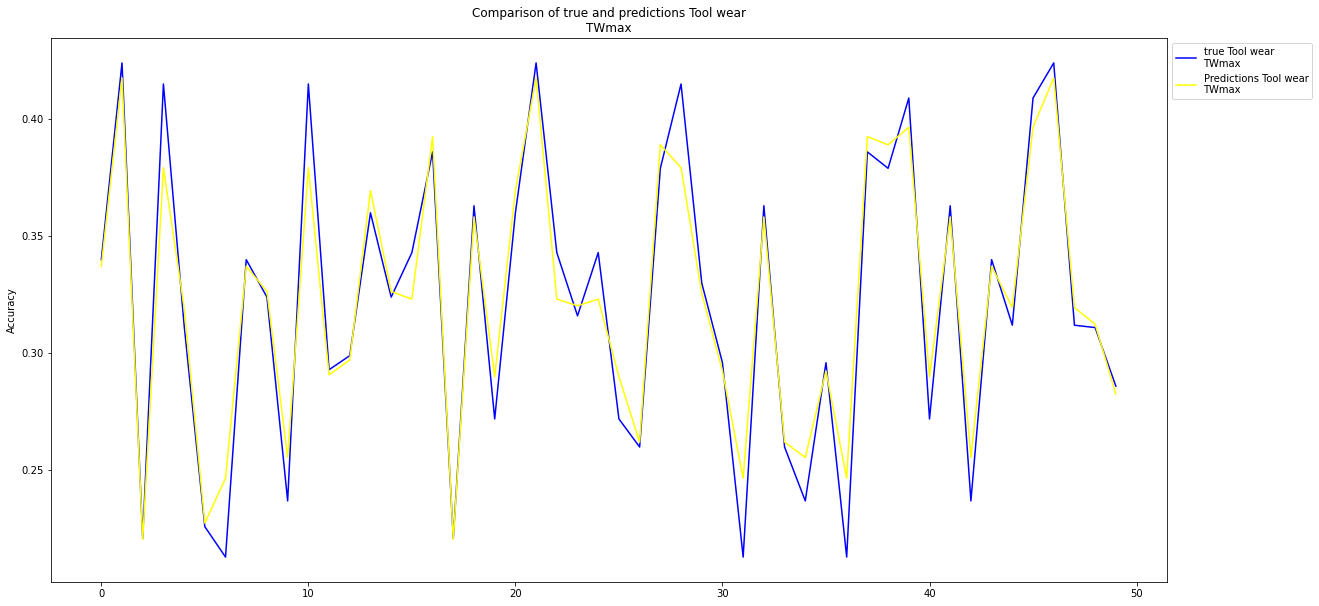

In [161]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(comparison['True Tool wear\nTWmax'].values,color='blue',label='true Tool wear\nTWmax')
plt.plot(comparison['Predicted Tool wear\nTWmax'].values,color='yellow',label='Predictions Tool wear\nTWmax')

plt.title('Comparison of true and predictions Tool wear\nTWmax')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [162]:
comparison.to_csv(r'CatBoost.csv', index = False, header=True)

Text(0.5, 0, 'CatBoost Feature Importance')

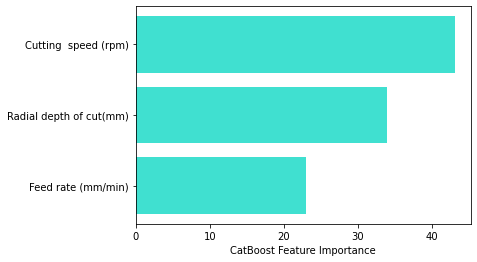

In [163]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(data.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")